# Predicting heart disease using machine learning
This notebook looks into using various python based machine learning and data science libraries is an attempt to built a machne learning model ost capable to predicting weather or not someone has heart disease based on their medical attributes:--

We 're going to take the following approach:
   1. Problem deinitions?
   2. Data
   3. Evaluation
   4. Features
   5. Modelling
   6. Experimentation
   
## 1. Problem defination
In a statement
> Given clinical, parameters can we predict whether or not tey have heart disease

## 2. Data
The original data came from the cleavland data from the machine learning repository.https://archive.ics.uci.edu/dataset/45/heart+disease

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.
  
  
## 3. Evaluation

If we can reach 95% accuracy at predicting wheather or not patient have heart disease during the proof of concept. we pursue the project

## 4. Features
  1. id (Unique id for each patient)
  2. age (Age of the patient in years)
  3. sex (Male:1/Female:0)
  4. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
  5. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
  6. chol (serum cholesterol in mg/dl)
  7. fbs (if fasting blood sugar > 120 mg/dl)
  8. restecg (resting electrocardiographic results)
  9. thalach: maximum heart rate achieved
  10. exang: exercise-induced angina (True/ False)
  11. oldpeak: ST depression induced by exercise relative to rest
  12. slope: the slope of the peak exercise ST segment
  13. ca: number of major vessels (0-3) colored by fluoroscopy
  14. thal: [normal; fixed defect; reversible defect]
  15. target: the predicted attribute


# Preparing the tools
import pandas numpy, matploblib for preprocessing, data analysis and manipulation

In [1]:
# Libraries for data analysis or preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.simplefilter('ignore')

# Scikit-learn libraries to help for machine learning modeling
from sklearn.model_selection import train_test_split
# because data is in form of clasification so we oly import classifiaction ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier,RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC

# Model evaluation
from sklearn.metrics import precision_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,f1_score,recall_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,auc,accuracy_score

# Data loading
df=pd.read_csv("heart-disease.csv")
df.head(5)  # It will print 5 row from top of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# shape of dataset
df.shape

(303, 14)

## Data explotary analysis or EDA:

In [3]:
# let see how many each classes there
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

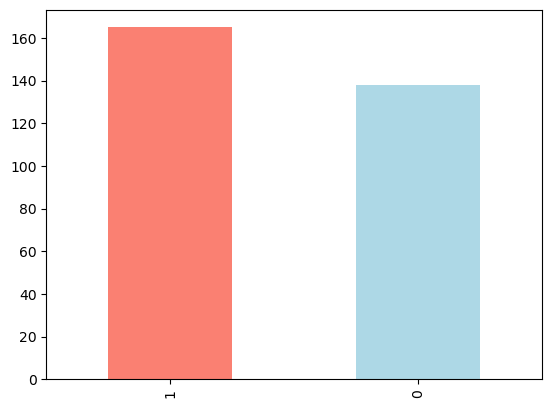

In [4]:
df.target.value_counts().plot(kind='bar',color=['salmon','Lightblue']);

In [5]:
# In dataset any null values is available or not
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Information about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df['new']=df['oldpeak'].apply(lambda x: round(x))

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  new       303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [10]:
# describe the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,1.036304
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,1.207867
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,6.000000


# Here frequency according to sex


In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Let's compare with sex coloumns and target coloumns in heart_disease dataset using crosstab of pandas libraries
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


Here we can see clearly 'heart-disease no':0,'heart-disease yes':1,{male=1/female:0} Heart-disease of male is 93 and for female is 72. As compare we get ratio wise female got heart-disease more time than male. Based on existing data female have 75% and male is 45% heart-disease.

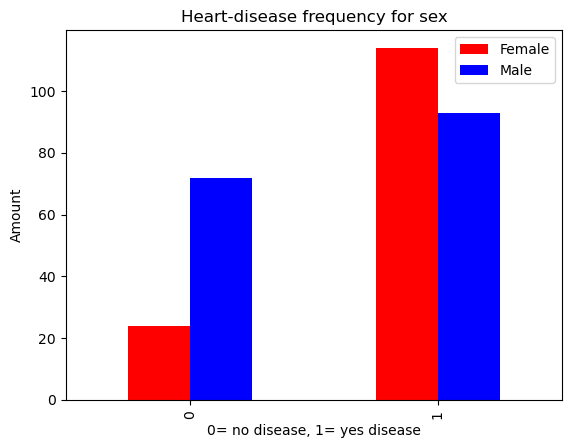

In [13]:
# create plot of crosstab
pd.crosstab(df.sex,df.target).plot.bar(color=['red','blue']);
plt.title('Heart-disease frequency for sex')
plt.xlabel('0= no disease, 1= yes disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])

# Here frequency according to fbs(if fasting blood sugar > 120 mg/dl)

In [14]:
# we see how many fbs classification 0: no, 1: yes
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [15]:
# Let's compare with fbs coloumns and target coloumns in heart_disease dataset using crosstab of pandas libraries
pd.crosstab(df.target,df.fbs)

fbs,0,1
target,,
0,116,22
1,142,23


we can assume which has fbs is no that is 58% approxmately heart-disease, and which has fbs that is 46% heart-disease approxmately

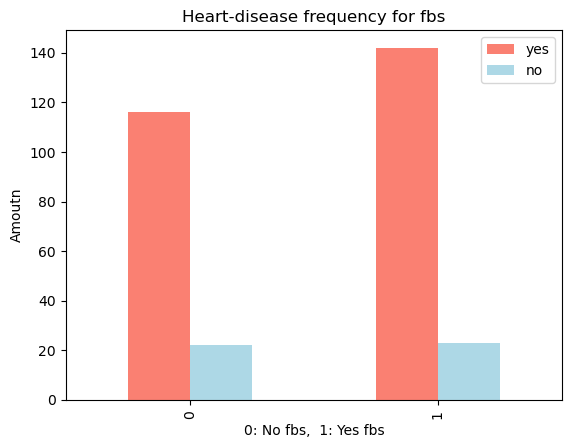

In [16]:
# create plot of crosstab of fbs frequency
pd.crosstab(df.target,df.fbs).plot(kind='bar',color=['salmon','Lightblue']);
plt.title('Heart-disease frequency for fbs')
plt.xlabel('0: No fbs,  1: Yes fbs')
plt.ylabel('Amoutn')
plt.legend('yes no'.split())

In [17]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


# Here frequency according to restecg(resting electrocardiographic results)so yes=1, No=0

In [18]:
# How many classification of restecg columns
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [19]:
# Using crosstab we compare with restecg coloumns and target coloumns
pd.crosstab(df.restecg,df.target)

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


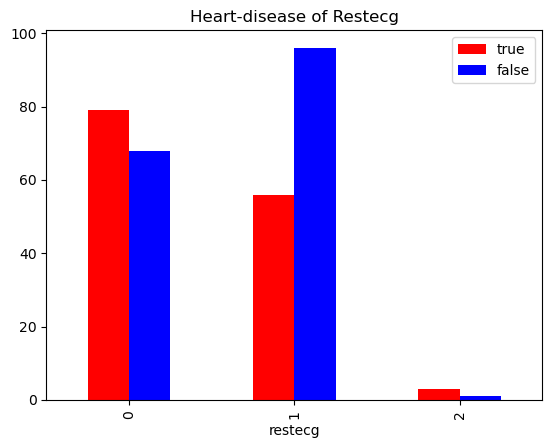

In [20]:
pd.crosstab(df.restecg,df.target).plot.bar(color=['red','blue'])
plt.title('Heart-disease of Restecg')
plt.legend('true false'.split())

# Here frequency according to exang(exercise-induced angina (True:1/ False:0))

In [21]:
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

In [22]:
# using crosstab we compare with target columns
pd.crosstab(df.target,df.exang)

exang,0,1
target,,
0,62,76
1,142,23


We can see there which has exang is True got 25% heart diseas approxmately and which has exang is False got 70% heart disease approxmately

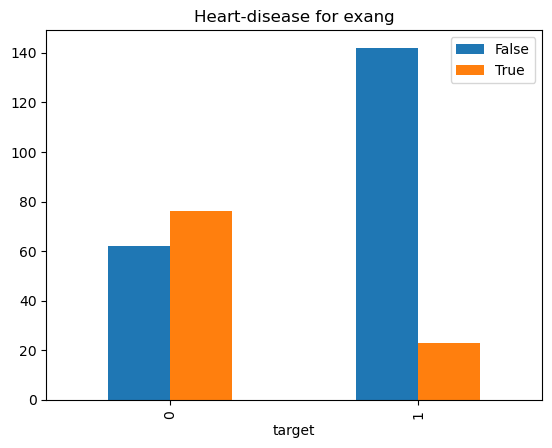

In [23]:
#create plot of crosstab
pd.crosstab(df.target,df.exang).plot(kind='bar')
plt.title('Heart-disease for exang')
plt.legend('False True'.split())

In [24]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [25]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [26]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [27]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

# We compare age , thalcahe and target

# Age vs Max heart rate  for heart-disease

Text(0.5, 1.0, 'Heart disease in function age vs thalach')

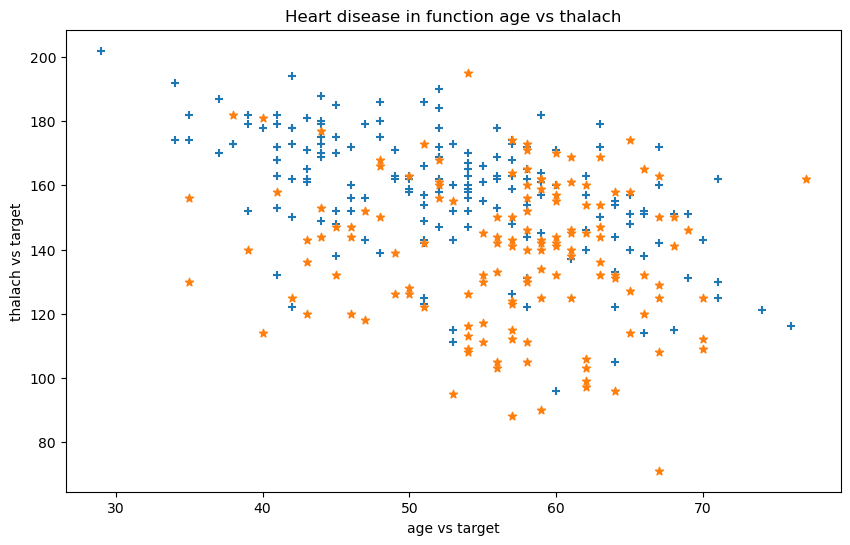

In [28]:
plt.figure(figsize=(10,6))
# scatter with positive example
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],cmap='plasma',marker='+')
plt.xlabel('age vs target')
plt.ylabel('thalach vs target')


# scatter with negative example
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],cmap='Lightblue',marker='*')
plt.xlabel('age vs target')
plt.ylabel('thalach vs target')

plt.title('Heart disease in function age vs thalach')

<Axes: ylabel='Frequency'>

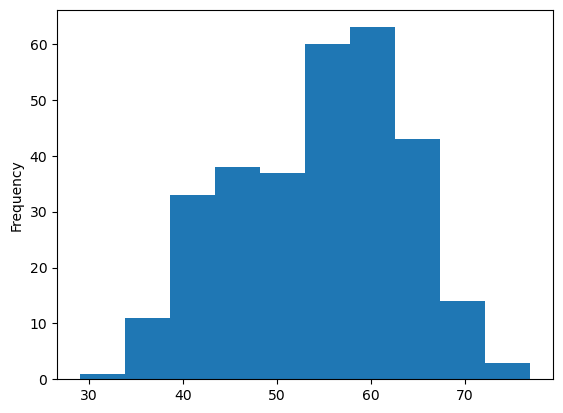

In [29]:
# check the distrubution of age columns by histogram
df.age.plot.hist()

<Axes: ylabel='Frequency'>

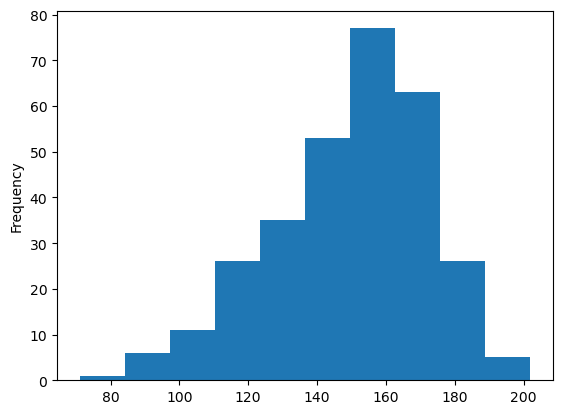

In [30]:
# check the distrubution of thal columns by histogram(norm distribution shape)
df.thalach.plot.hist()

# heart_disease frequency for chest pain(cp):chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

In [31]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [32]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0.5, 1.0, 'heart_disease frequency for chest pain')

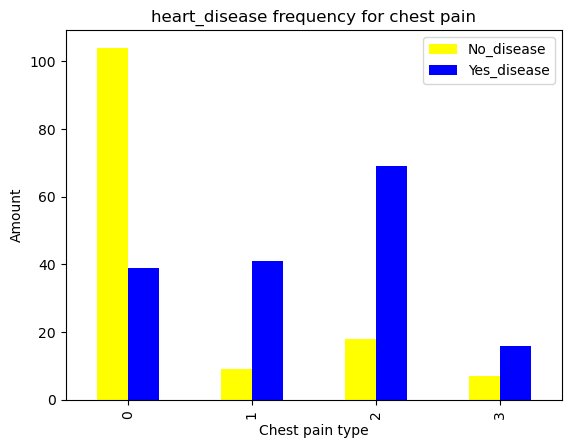

In [33]:
pd.crosstab(df.cp,df.target).plot.bar(color='yellow blue'.split())
plt.legend('typical_angina atypical_angina non_anginal asymptomatic'.split())
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No_disease','Yes_disease'])
plt.title('heart_disease frequency for chest pain')

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [35]:
# Make correlation metrics
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.201927
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,0.085212
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.131849
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.186657
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.054430
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.004877
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.056347
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.333098
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.288300
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.980479


(15.0, 0.0)

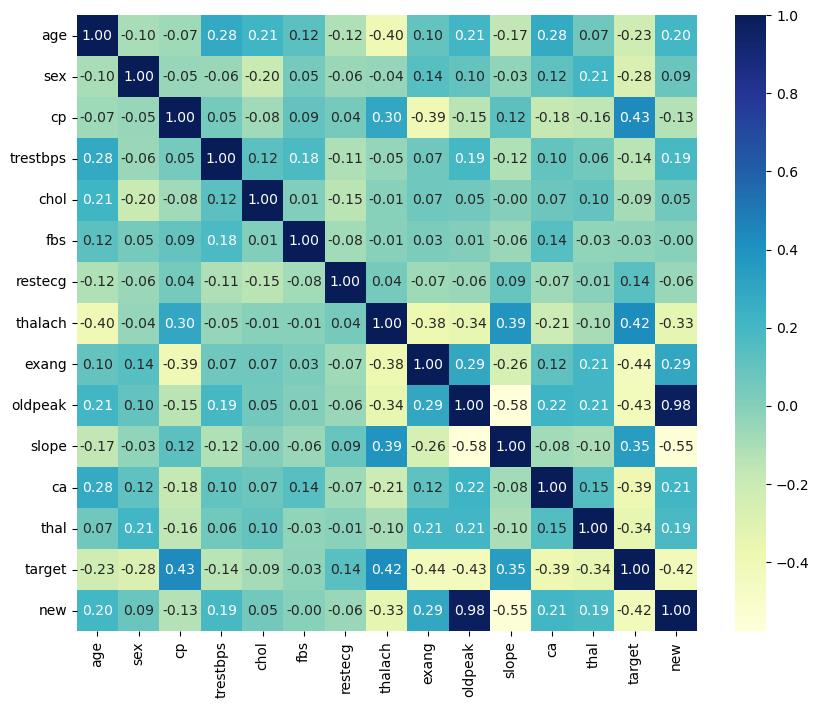

In [36]:
# visualization
figure,ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(df.corr(),annot=True, cmap='YlGnBu',fmt='.2f')
bottom,top=ax.get_ylim()
ax.set_ylim()

# Modelling

In [37]:
# split data into x and y
x=df.drop(['target'],axis=1)
y=df.target

In [38]:
# train and test data for modelling
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

Now we have get our data split into training and test sets. It's time to build machine learning models.

we will train it (find the patterns) on the training set.
And we will test it use.

We are going to try three different ML models:

    1. Logistic Regression
    2. KNN
    3. RandomForestClassifier

In [39]:
# create the dictionary for models
models={
    'LogisticRegression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Random Forest Classifier':RandomForestClassifier(),
    'Naive_bayes': MultinomialNB()
}


# create function for fit and evaluate on training and test data:---

def fit_and_eval(models,x_train,x_test,y_train,y_test):
    
    '''
    fits and evaluate given a achine learning models.
    models: a dict of different scikit-learn machine learning models
    
    x_train=features data for training
    x_test=features data for test
    y_train=training labels
    y_test=test labels
    '''
    np.random.seed(42)
    results={}
    
    for name,model in models.items():
        model.fit(x_train,y_train)
#         model.score(x_test,y_test)
        
        results[name]=model.score(x_test,y_test)
    return results

In [40]:
model_scores=fit_and_eval(models,x_train,x_test,y_train,y_test)

In [41]:
model_scores

{'LogisticRegression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8524590163934426,
 'Naive_bayes': 0.8360655737704918}

<Axes: >

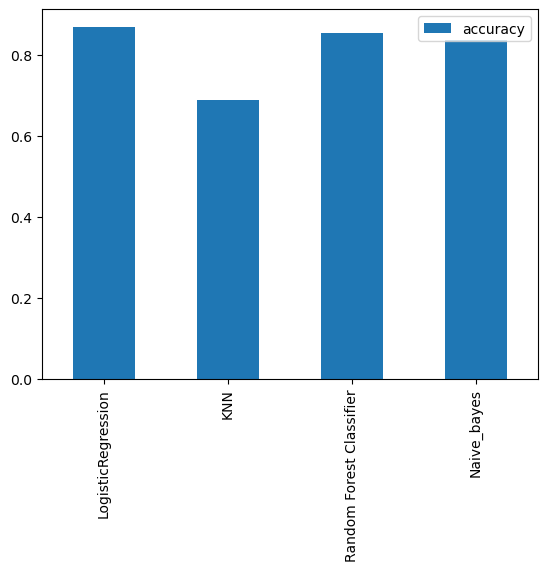

In [42]:
model_compare=pd.DataFrame(model_scores,index=['accuracy']
    )
model_compare
model_compare.T.plot.bar()

Now we have got a baseline model first predictions are not always what we should best our next steps pf we should do.

Let's look at following:

* Feature importance
* confusion matrix
* cross validation
* precision
* Recall
* f1 score
* Roc Curve
* Auc curve

# Hyperparameter tuning

# KNN

In [43]:
# create empty list for train_score,test_scores
train_scores=[]
test_score=[]
# create  a list for different values

neighbor=range(1,21)
knn=KNeighborsClassifier()

# uysing loop function to evaluate the classification on different values
for i in neighbor:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

In [44]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.7396694214876033,
 0.7603305785123967,
 0.7479338842975206,
 0.743801652892562,
 0.7272727272727273,
 0.7231404958677686,
 0.6983471074380165,
 0.731404958677686,
 0.6942148760330579,
 0.6859504132231405,
 0.6942148760330579,
 0.6900826446280992,
 0.6694214876033058,
 0.6859504132231405,
 0.6652892561983471,
 0.6900826446280992,
 0.6652892561983471]

In [45]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

max knn score on test data : 75.409836%


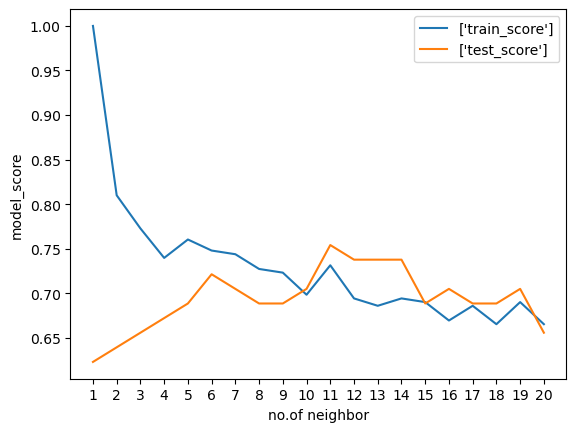

In [46]:
plt.plot(neighbor,train_scores,label=['train_score'])
plt.plot(neighbor,test_score,label=['test_score'])
plt.xticks(np.arange(1,21,1))
plt.xlabel('no.of neighbor')
plt.ylabel('model_score')
plt.legend()
print(f"max knn score on test data : {max(test_score)*100:2f}%")

In [9]:
clf2=LogisticRegression()

In [48]:
pram_log_grid={
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
 
    
}
cl1=RandomForestClassifier()
rf_grid={
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None,3,5,10,20],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2),
    'max_features':["sqrt", "log2"]
}

# LOgistic Regression Hyper Parameter tuning

In [49]:
RLR=RandomizedSearchCV(LogisticRegression(),param_distributions=pram_log_grid,n_iter=20,verbose=True,cv=5,)

In [50]:
RLR.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [51]:
RLR.best_estimator_

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [52]:
logreg_new=LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [54]:
logreg_new.fit(x_train,y_train)
lr_score=logreg_new.score(x_test,y_test)
lr_score

0.8852459016393442

# Random Forest Clf Tuning

In [55]:
RF_RSCV=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,n_iter=20,verbose=True,cv=5)

In [56]:
RF_RSCV.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
RF_RSCV.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=17, min_samples_split=16,
                       n_estimators=160)

In [58]:
rf_new=RandomForestClassifier(max_depth=10, min_samples_leaf=17, min_samples_split=16,
                       n_estimators=160)

In [59]:
rf_new.fit(x_test,y_test)

RandomForestClassifier(max_depth=10, min_samples_leaf=17, min_samples_split=16,
                       n_estimators=160)

In [60]:
rf_score=rf_new.score(x_test,y_test)
rf_score

0.8688524590163934

In [61]:
cross_val_score(clf2,x,y,scoring='accuracy',cv=5)

array([0.80327869, 0.8852459 , 0.81967213, 0.86666667, 0.75      ])

# Hyperparameter Tunning with GridSearchCV

In [62]:
# for Logistic regression hyperparameter tunning by GridSearchCv
pram_log_grid={
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}

grid_cv=GridSearchCV(LogisticRegression(),param_grid=pram_log_grid,verbose=True,cv=5)

grid_cv.fit(x_train,y_train)
grid_cv.best_params_

log_grid_cv=LogisticRegression(C=0.615848211066026,solver='liblinear')
log_grid_cv.fit(x_train,y_train)
grid_log_score=log_grid_cv.score(x_test,y_test)
grid_log_score

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

In [63]:
# for Randomforest clf hyperparameter using GridSearch
rf_grid={
    'n_estimators':[500,1000,1200],
    'max_depth':[None],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,3,6]
}

Grid_rf=GridSearchCV(RandomForestClassifier(),param_grid=rf_grid,verbose=2,cv=5)
Grid_rf.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END

[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=1200; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=1200; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=4, n_estimators=1200; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=4,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 3, 6],
                         'min_samples_split': [2, 4],
                         'n_estimators': [500, 1000, 1200]},
             verbose=2)

In [64]:
# After GridSerach fit for RandomForest clf
Grid_rf.best_estimator_
Grid_rf_clf=RandomForestClassifier(n_estimators=500)
Grid_rf_clf.fit(x_train,y_train)
Random_grid_score=Grid_rf_clf.score(x_test,y_test)
Random_grid_score

0.8524590163934426

In [65]:
print(lr_score)
print(rf_score)
print(grid_log_score)
print(Random_grid_score)
model_scores

0.8852459016393442
0.8688524590163934
0.8852459016393442
0.8524590163934426


{'LogisticRegression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8524590163934426,
 'Naive_bayes': 0.8360655737704918}

# Visualization the model scores by RandomizeSearchcv,GridSearchcv generated by different models

<Axes: title={'center': 'differennt models by gridsearch and randomserch cv'}>

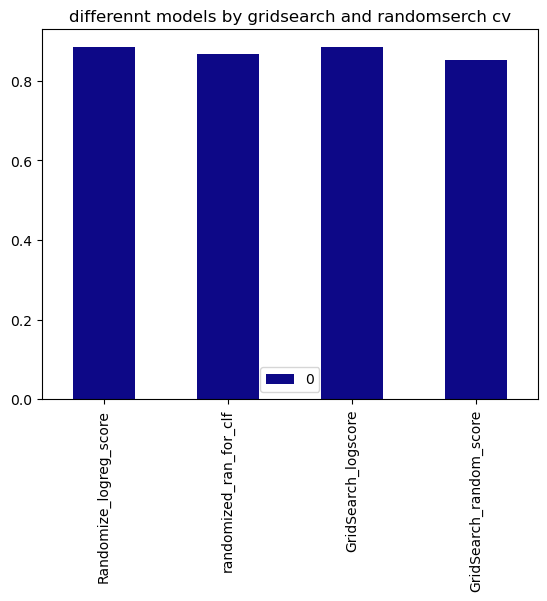

In [66]:
models_scores_compare=pd.DataFrame({
    'Randomize_logreg_score':lr_score,
    'randomized_ran_for_clf':rf_score,
    'GridSearch_logscore':grid_log_score,
    'GridSearch_random_score':Random_grid_score
},index=[0])
models_scores_compare.T.plot.bar(title='differennt models by gridsearch and randomserch cv',cmap='plasma')

# Evaluted our tune machine lerning model classifier

* Roc curve and AUC curve
* Confusion metrics
* classification Report
* Precision score
* recall
* f1 score

and it would be grate if cross vallidation was used here

# tuned classifier using Logistic Regression claassifier

In [67]:
# prediction for evalution
y_pred=logreg_new.predict(x_test)
y_pred[:5],print(y_test[:5])

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64


(array([0, 1, 1, 0, 1], dtype=int64), None)

In [68]:
ROC=roc_curve(y_test,y_pred)
ROC

(array([0.        , 0.13793103, 1.        ]),
 array([0.     , 0.90625, 1.     ]),
 array([inf,  1.,  0.]))

In [69]:
print(f"Roc curve :{roc_curve(y_test,y_pred)}")

Roc curve :(array([0.        , 0.13793103, 1.        ]), array([0.     , 0.90625, 1.     ]), array([inf,  1.,  0.]))


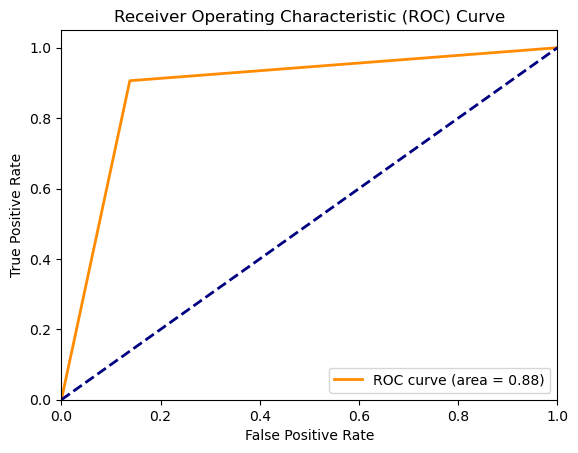

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_true (true labels) and y_score (predicted scores/probabilities)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [71]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Assuming you have y_true (true labels) and y_score (predicted scores/probabilities)

# fpr, tpr, thresholds = roc_auc_score(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()
roc_auc_score(y_test,y_pred)

0.8841594827586207

# Evaluation metrics score

In [72]:
def evaluate(y_true,y_pred):
    scores={
        'precision':precision_score(y_true,y_pred),
        'f1':f1_score(y_true,y_pred),
        'roc_auc':roc_auc_score(y_true,y_pred),
        'accuracy':accuracy_score(y_true,y_pred)
    }
    
    results={}
    for name,score in scores.items():
        results[name]=score
    return results

In [73]:
evaluate(y_test,y_pred)

{'precision': 0.8787878787878788,
 'f1': 0.8923076923076922,
 'roc_auc': 0.8841594827586207,
 'accuracy': 0.8852459016393442}

In [74]:
f1_score(y_test,y_pred)

0.8923076923076922

# Classification Report

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# calculatte cross validation using differnt types of scoring

we are going to calculate accuracy,precision and f1 score for our model using cross_val_score

In [76]:
# using precision
cv_precision=cross_val_score(logreg_new,x,y,scoring='precision',cv=5)
cv_precision=np.mean(cv_precision)
cv_precision

0.8144073944073943

In [77]:
#using f1 score
cv_f1=cross_val_score(logreg_new,x,y,scoring='f1',cv=5)
cv_f1=np.mean(cv_f1)
cv_f1

0.8579598913039688

In [78]:
# using accuracy
cv_accuracy=cross_val_score(logreg_new,x,y,scoring='accuracy',cv=5)
cv_accuracy=np.mean(cv_accuracy)
cv_accuracy

0.834808743169399

In [79]:
# using roc_auc
cv_roc=cross_val_score(logreg_new,x,y,scoring='roc_auc',cv=5)
cv_roc=np.mean(cv_roc)
cv_roc

0.9025653358986692

# let's visualize all this scores

<Axes: title={'center': 'Cross validation scores'}>

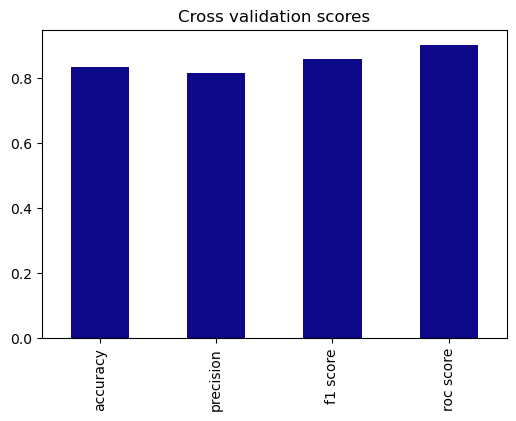

In [80]:
scores_compares=pd.DataFrame({
    'accuracy':cv_accuracy,
    'precision':cv_precision,
    'f1 score':cv_f1,
    'roc score':cv_roc
},index=[0])

scores_compares.T.plot.bar(figsize=(6,4),cmap='plasma',title='Cross validation scores',legend=False)

# Confustion Matrix

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [82]:
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


In [83]:
cm=confusion_matrix(y_test,y_pred)

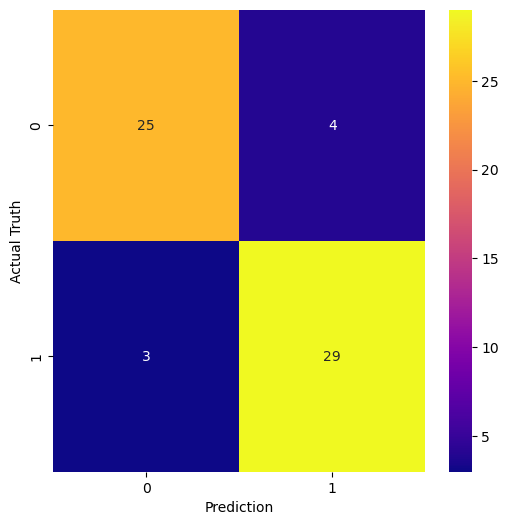

In [84]:
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='plasma')
plt.xlabel('Prediction')
plt.ylabel('Actual Truth')
plt.show()

# Visualization of confusion  Using ConfusionMatrixDisplay function

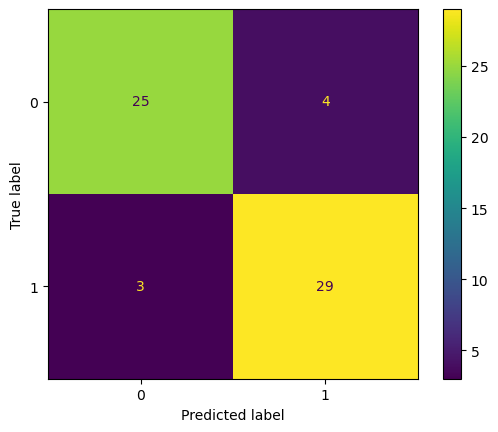

In [85]:
disp=ConfusionMatrixDisplay(cm,display_labels=logreg_new.classes_)
disp.plot()

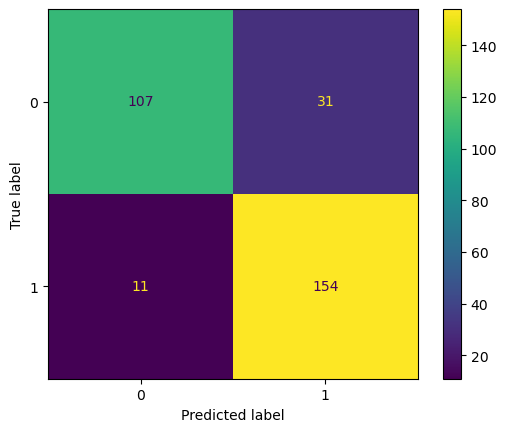

In [86]:
ConfusionMatrixDisplay.from_estimator(logreg_new,x,y)

<Figure size 300x300 with 0 Axes>

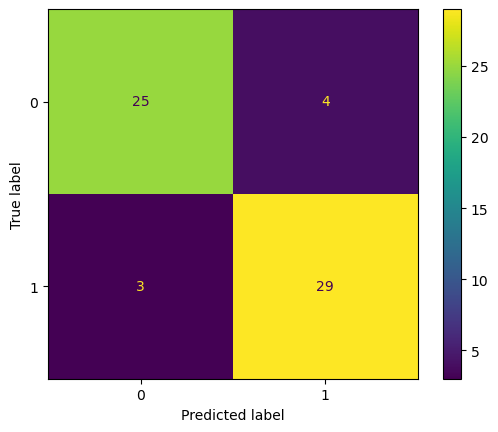

In [87]:
plt.figure(figsize=(3,3))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# dispaly roc curve using RocCurveDisplay

In [88]:
from sklearn.metrics import RocCurveDisplay

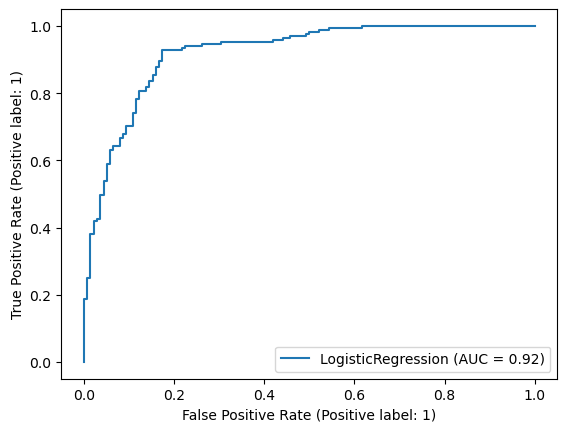

In [89]:
RocCurveDisplay.from_estimator(logreg_new,x,y)

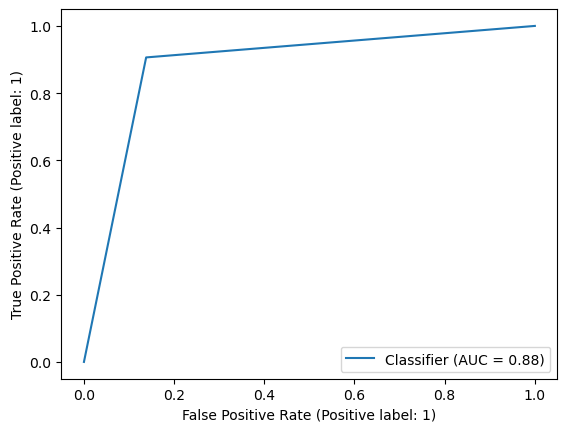

In [90]:
RocCurveDisplay.from_predictions(y_test,y_pred)

# Feature Importance

Feature importance is another asking,which features contributed most fo the out comes of the model and how they contributed

finfing features importance is different for ecah machine learning model. One way to find features importance using model_nmame search features importance

let's find out features importance for our logistic model

In [91]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [92]:
# fit and instance for our model
RLR.best_params_
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [93]:
# fit and train the model
clf.fit(x_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [94]:
# check coef_
clf.coef_

array([[ 0.00356171, -0.89879942,  0.68990518, -0.01154563, -0.00153522,
         0.03662792,  0.34594196,  0.02477967, -0.62265919, -0.33636507,
         0.45816583, -0.65166145, -0.71325636, -0.2720199 ]])

In [95]:
# parameteabsr
clf.intercept_

array([0.06881596])

In [96]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [97]:
# match coef features to column
features_dict=dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.0035617105290655523,
 'sex': -0.8987994242783257,
 'cp': 0.689905177373422,
 'trestbps': -0.011545633149088208,
 'chol': -0.0015352172442238423,
 'fbs': 0.036627923159956534,
 'restecg': 0.345941964612491,
 'thalach': 0.02477966777396928,
 'exang': -0.6226591868059413,
 'oldpeak': -0.33636506904790753,
 'slope': 0.4581658267969638,
 'ca': -0.6516614478738788,
 'thal': -0.7132563552504468,
 'target': -0.27201990294550127}

In [98]:
63*0.003699220218693+1*(-0.9042408909021112)+3*0.6747282639169492+145*(-0.01161340193177967)+233*(-0.001703644306964925)+1*0.047876883381437196+150*0.024729383642503815+2.3*(-0.5759093926828687)+1*(-0.6998420593767237)+0.06732311

1.0722762482052033

# Visualize features importance

Text(0.5, 0, 'features_name')

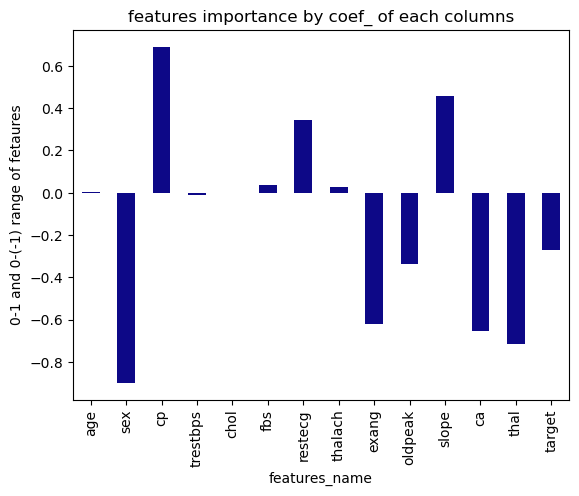

In [99]:
features_compares=pd.DataFrame(features_dict,index=[0])
features_compares.T.plot.bar(title='features importance by coef_ of each columns',cmap='plasma',legend=False)
plt.ylabel('0-1 and 0-(-1) range of fetaures')
plt.xlabel('features_name')

In [100]:
pd.crosstab(df.slope,df.target)
# positive corr means target ratio increased
# negative corr means target ratio decreases

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [101]:
pd.crosstab(df.thal,df.target)

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28


In [102]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


# Experimentations

if you have note hit eavluation metrics yet ask yourself .....
* Could you  cllect more data
* Coulld you try better model? like catBost or xGBost
* could you improve a current models? (what we have done so far
* if your model is good enough ( you have hit your evaluation metrics)



In [ ]:
np.logspace(-4,4,20)

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1


In [13]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,new
0,63,1,3,145,233,1,0,150,0,0,0,1,2
1,37,1,2,130,250,0,1,187,0,0,0,2,4
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,0,3,1
300,68,1,0,144,193,1,1,141,0,1,2,3,3
301,57,1,0,130,131,0,1,115,1,1,1,3,1


In [14]:
# trail 1 with training model
# np.random.seed(42)
x=df.drop(columns=['target','oldpeak'])
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
clf1=RandomForestClassifier()
clf2=LogisticRegression()
clf3=KNeighborsClassifier()
clf4=DecisionTreeClassifier()
clf5=SVC()
clf6=LinearSVC()
clf7=MultinomialNB()
clf8=RidgeClassifierCV()
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)
clf4.fit(x_train,y_train)
clf5.fit(x_train,y_train)
clf6.fit(x_train,y_train)
clf7.fit(x_train,y_train)
clf8.fit(x_train,y_train)
print('RFC score :',clf1.score(x_test,y_test))
print('LOG score :',clf2.score(x_test,y_test))
print('Kneigh score :',clf3.score(x_test,y_test))
print('Dtree score :',clf4.score(x_test,y_test))
print('svm score :',clf5.score(x_test,y_test))
print('svmLinear score :',clf6.score(x_test,y_test))
print('Naive_byes score :',clf7.score(x_test,y_test))
print('RidgeClassifierCv: ',clf8.score(x_test,y_test))

RFC score : 0.8360655737704918
LOG score : 0.8360655737704918
Kneigh score : 0.6229508196721312
Dtree score : 0.7704918032786885
svm score : 0.7213114754098361
svmLinear score : 0.8032786885245902
Naive_byes score : 0.7540983606557377
RidgeClassifierCv:  0.8360655737704918


In [29]:
df=pd.read_csv('heart-disease.csv')

In [30]:
df['new_oldpeak']=df.oldpeak.map(lambda x: round(x))

In [31]:
X=df.drop(columns=['oldpeak','target'])

In [32]:
y=df['target']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [34]:
model=RidgeClassifierCV()

In [35]:
model.fit(x_train,y_train)

RidgeClassifierCV()

In [36]:
model.score(x_test,y_test)

0.9016393442622951

In [37]:
with open('myModel.pkl', 'wb') as file:
    pickle.dump(model, file)

NameError: name 'pickle' is not defined